<a href="https://colab.research.google.com/github/mystic23/Lab01Optimizacion/blob/main/Lab01_Opti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Universidad del Norte**

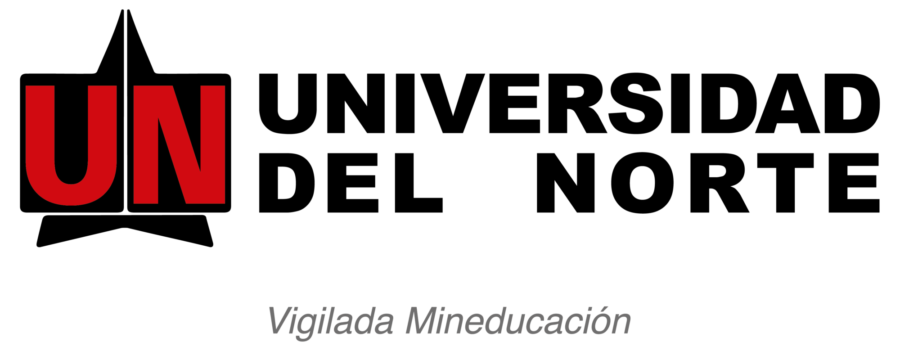

**<h3> IST7420 - Optimización</h3>**
<h3> Primer Laboratorio de Optimización </h3>

**<h4> Presentado a:</h4>**
<h4> Ph.D Margarita Gamarra Acosta </h4>

**<h4> Presentado por:</h4>**
<h4> David Hernandez - María Solá  - Kevin Torregrosa</h4>

In [ ]:
import time
import scipy
import math
import numpy as np
import sympy as sp
from numpy import linspace
from scipy.sparse import coo_matrix, csr_matrix, csc_matrix,lil_matrix,dia_matrix
import matplotlib.pyplot as plt
from sympy import exp,factorial,sin,factorial,cos
from math import floor

# 1

## Escoge un problema de optimización de dos variables (o puedes crear uno también). Plantea su función de costo y las restricciones. Grafica la región factible con ayuda de Python. Desarrolla un programa que le permita al usuario:
## **a**. tener el valor de la función de costo a partir de un punto (x, y)
## **b.** ver gráficamente cómo cambia la región factible ante un cambio en las restricciones.




### Ejercicio:

Una empresa tecnoquímica desea crear un compuesto multivitamínico mediante mezcla de fruta de dos tipos: tipo A y tipo B. Cada unidad de fruta de tipo A contiene a1 mg de vitamina 1 y a2 mg de vitamina 2. Cada unidad de fruta de tipo A contiene b1 mg de vitamina 1 y b2 mg de vitamina 2. La unidad de fruta tipo A tiene un costo de price_a euros y la de tipo B cuesta a price_b euros la unidad. La meta es diseñar una ración que tenga al menos min1 de vitamina 1 y min2 de vitamina 2, minimizando los costos de su fabricación. Construye un modelo de programación lineal para la empresa tecnoquímica. Tener en cuenta la condición de no negatividad: El número de unidades de fruta de cada tipo que se incluyan en la ración debe ser mayor o igual que cero.

In [ ]:
a1 = 2
a2 = 6
b1 = 2
b2 = 3
price_a = 5
price_b = 20
min1 = 36
min2 = 60
print("Valores predeterminados:")
print(f"a1: {a1}")
print(f"a2: {a2}")
print(f"b1: {b1}")
print(f"b2: {b2}")
print(f"price_a: {price_a}")
print(f"price_b: {price_b}")
print(f"min1: {min1}")
print(f"min2: {min2}")
a, b = sp.symbols('a b')
p1 = sp.plot_implicit(sp.And(a1*a + b1*b >= min1, a2*a + b2*b >= min2), (a, 0, 20), (b, 0, 20), line_color = "#00ff80", show=False, xlabel='a', ylabel='b')
while True:
    print("-------------------------------------------------------------------")
    print("¿Qué desea hacer?")
    print("1. Calcular costo de una ración")
    print("2. Ver gráfica de la región factible")
    print("3. Salir")
    op = int(input("Ingrese una opción: "))
    if op == 1:
        x = float(input("\tIngrese el valor de a: "))
        y = float(input("\tIngrese el valor de b: "))
        if x >= 0 and y >= 0:
            costo = price_a*x + price_b*y
            print("\tEl costo de la ración es: ", costo)
        else:
            print("\tIngrese valores válidos")
    elif op == 2:
        print("\tDesea cambiar las restricciones?")
        print("\t1. Si")
        print("\t2. No")
        op2 = int(input("\tIngrese una opción: "))
        if op2 == 1:
            print("\t\tIngrese el número de la variable que desea cambiar:")
            print("\t\t1. a1")
            print("\t\t2. a2")
            print("\t\t3. b1")
            print("\t\t4. b2")
            print("\t\t5. price_a")
            print("\t\t6. price_b")
            print("\t\t7. min1")
            print("\t\t8. min2")
            op3 = int(input("\t\tIngrese una opción: "))
            if op3 == 1:
                a1 = float(input("\t\tIngrese el valor de a1: "))
            elif op3 == 2:
                a2 = float(input("\t\tIngrese el valor de a2: "))
            elif op3 == 3:
                b1 = float(input("\t\tIngrese el valor de b1: "))
            elif op3 == 4:
                b2 = float(input("\t\tIngrese el valor de b2: "))
            elif op3 == 5:
                price_a = float(input("\t\tIngrese el valor de price_a: "))
            elif op3 == 6:
                price_b = float(input("\t\tIngrese el valor de price_b: "))
            elif op3 == 7:
                min1 = float(input("\t\tIngrese el valor de min1: "))
            elif op3 == 8:
                min2 = float(input("\t\tIngrese el valor de min2: "))
            else:
                print("\t\tIngrese una opción válida")
            p1 = sp.plot_implicit(sp.And(a1*a + b1*b >= min1, a2*a + b2*b >= min2), (a, 0, 20), (b, 0, 20), line_color = "#00ff80", show=False, xlabel='a', ylabel='b')
        p1.show()
    elif op == 3:
        print("Adiós :)")
        break
    else:
        print("Ingrese una opción válida")

Valores predeterminados:
a1: 2
a2: 6
b1: 2
b2: 3
price_a: 5
price_b: 20
min1: 36
min2: 60
-------------------------------------------------------------------
¿Qué desea hacer?
1. Calcular costo de una ración
2. Ver gráfica de la región factible
3. Salir
Ingrese una opción: 3
Adiós :)


# 2

## Selecciona un método de representación de matrices sparse e impleméntalo en Python desde cero. Compara tus resultados con la función de las librerías de Python.

In [ ]:
size = 10  # Tamaño de matriz
dispersion = 0.2 # Dispersión (proporción de no nulos)

# Matriz A (dispersa)
A = np.zeros((size,size)) # Se crea matríz nula

for i in range(size): # usando dispersion se agregan valores
    for j in range(size):
        if np.random.rand() < dispersion:
            A[i,j] = np.random.randint(10)

print(A)

[[0. 0. 0. 0. 8. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 6. 0. 3. 0. 8. 0.]
 [8. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 8. 0. 4. 1. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 8. 0. 8. 0. 8. 0. 0. 0. 0.]
 [3. 0. 0. 5. 0. 0. 0. 0. 0. 0.]]


## **COO**

In [ ]:
def custom_coo(matriz):
  row = []
  col = []
  data = []

  for r in range(matriz.shape[0]):
    for c in range(matriz.shape[1]):
      if matriz[r,c] != 0:
        row.append(r)
        col.append(c)
        data.append(matriz[r,c])
        # agregar cada indice de fila,columna y valor a arreglos
  return row,col,data

In [ ]:
# comparar con métodos de scipy
print("Implementación Scipy")
coo = coo_matrix(A)
print("Filas: ",coo.row)
print("Columnas: ",coo.col)
print("Datos: ",coo.data)

print("\nImplementación Desde 0")
row,col,data = custom_coo(A)
print("Filas: ",row)
print("Columnas: ",col)
print("Datos: ",data)

Implementación Scipy
Filas:  [0 2 3 3 4 4 4 5 5 6 6 6 6 8 8 8 9 9]
Columnas:  [4 1 0 3 4 6 8 0 3 3 5 6 9 1 3 5 0 3]
Datos:  [8. 4. 3. 2. 6. 3. 8. 8. 1. 8. 4. 1. 5. 8. 8. 8. 3. 5.]

Implementación Desde 0
Filas:  [0, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 6, 8, 8, 8, 9, 9]
Columnas:  [4, 1, 0, 3, 4, 6, 8, 0, 3, 3, 5, 6, 9, 1, 3, 5, 0, 3]
Datos:  [8.0, 4.0, 3.0, 2.0, 6.0, 3.0, 8.0, 8.0, 1.0, 8.0, 4.0, 1.0, 5.0, 8.0, 8.0, 8.0, 3.0, 5.0]


## **CSR**

In [ ]:
def custom_csr(matrix):
  data = []
  indices = []
  indptr = [0]
  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
      if matrix[i,j] != 0:
        data.append(matrix[i,j])
        indices.append(j)
    indptr.append(len(indices))
    # puntero es contar indices al terminar de recorrer filas
  return data,indices,indptr

data,indices,indptr = custom_csr(A)


In [ ]:
print("Implementación scipy")
csr = csr_matrix(A)
print(csr.data)
print(csr.indptr)
print(csr.indices)

print("\nImplementación desde 0")
print(data)
print(indptr)
print(indices)

Implementación scipy
[8. 4. 3. 2. 6. 3. 8. 8. 1. 8. 4. 1. 5. 8. 8. 8. 3. 5.]
[ 0  1  1  2  4  7  9 13 13 16 18]
[4 1 0 3 4 6 8 0 3 3 5 6 9 1 3 5 0 3]

Implementación desde 0
[8.0, 4.0, 3.0, 2.0, 6.0, 3.0, 8.0, 8.0, 1.0, 8.0, 4.0, 1.0, 5.0, 8.0, 8.0, 8.0, 3.0, 5.0]
[0, 1, 1, 2, 4, 7, 9, 13, 13, 16, 18]
[4, 1, 0, 3, 4, 6, 8, 0, 3, 3, 5, 6, 9, 1, 3, 5, 0, 3]


# **3**

## Crea un programa para implementar la expansión en series de Taylor. El usuario debe ingresar la cantidad de términos de la expansión, el punto de expansión y la función a representar (debe tener al menos 5 funciones diferentes para escoger). Se debe mostrar en una gráfica la función original y la aproximación.


In [ ]:
n = int(input("Ingrese la cantidad de términos: "))
a = float(input("Ingrese el punto de expansión:= "))

while n<=0 or a<=0:
  print("Ingrese valores válidos")
  n = int(input("Ingrese la cantidad de términos: "))
  a = float(input("Ingrese el punto de expansión:= "))

Ingrese la cantidad de términos: -1
Ingrese el punto de expansión:= 2
Ingrese valores válidos
Ingrese la cantidad de términos: 5
Ingrese el punto de expansión:= 0
Ingrese valores válidos
Ingrese la cantidad de términos: 0
Ingrese el punto de expansión:= 0
Ingrese valores válidos
Ingrese la cantidad de términos: 10
Ingrese el punto de expansión:= 2


In [ ]:
list_f = ["exp(x)","sin(x)+cos(x)","ln(x+20)","sqrt(1+x)","sinh(x)"]
print("Funciones:")
print("1. exp(x)")
print("2. sin(x)+cos(x)")
print("3. ln(x+20)")
print("4. sqrt(1+x)")
print("5. sinh(x)")
print("6. Personalizada")
op = int(input("Ingrese la función a representar: "))

while op<1 or op>6:
  print("Ingrese una opción válida")
  op = int(input("Ingrese la función a representar: "))
expression_str = list_f[op-1]
f = sp.sympify(expression_str)

Funciones:
1. exp(x)
2. sin(x)+cos(x)
3. ln(x+20)
4. sqrt(1+x)
5. sinh(x)
6. Personalizada
Ingrese la función a representar: 2


In [ ]:

x = sp.Symbol("x")

if op==6:
  expression_str= input("Ingrese la función a representar: ")
  f = sp.sympify(expression_str)

# Convert the symbolic expression to a numerical function (for plotting)

#n = 10 # terminos
# = 0 # punto de expansion
suma = 0
for i in range(n+1):
  suma = suma+ (sp.diff(f,x,i).subs(x,a)*(x-a)**i)/(factorial(i))

suma

-1.32544426337282*x - 0.00013916066039606*(0.5*x - 1)**10 - 0.00187011536278353*(0.5*x - 1)**9 + 0.00313111485891136*(0.5*x - 1)**8 + 0.0336620765301035*(0.5*x - 1)**7 - 0.0438356080247591*(0.5*x - 1)**6 - 0.353451803566086*(0.5*x - 1)**5 + 0.328767060185693*(0.5*x - 1)**4 + 1.76725901783043*(0.5*x - 1)**3 - 0.986301180557079*(0.5*x - 1)**2 + 3.14403911702419

In [ ]:
low = int(input("Ingrese el intervalo inferior: "))
up = int(input("Ingrese el intervalo superior: "))

while low>=up:
  print("Ingrese valores válidos")
  low = int(input("Ingrese el intervalo inferior: "))
  up = int(input("Ingrese el intervalo superior: "))

Ingrese el intervalo inferior: 0
Ingrese el intervalo superior: 20


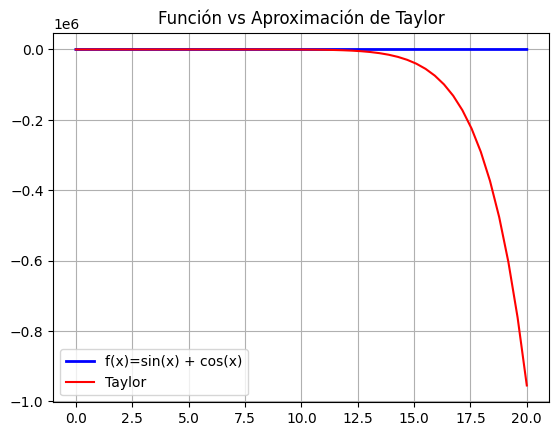

In [ ]:
equis = np.linspace(low,up,50)
fx = [f.subs(x,val) for val in equis]
taylor = [suma.subs(x,val) for val in equis]

plt.plot(equis,fx,'-b',lw=2,label=f'f(x)={f}')
plt.plot(equis,taylor,'-r',label='Taylor')
plt.title("Función vs Aproximación de Taylor")
plt.legend()
plt.grid()
plt.show()


# **4**

## Escoge 3 algoritmos de optimización sin restricciones. Realiza cambios sobre sus parámetros y sobre el punto inicial. ¿Cómo afectan estos cambios los resultados? ¿Cómo afecta el tiempo de convergencia o cantidad de iteraciones? Nota: Puedes utilizar las librerías de Python y alguna ayuda gráfica o tabulaciones si lo necesitan para soportar sus conclusiones.

### Función a minimizar con los tres metodos
$f(x) = x^2 \quad f'(x) = 2x$

### Metodos:


### *   Descenso de Gradiente
### *   Metodo de Newton
### *   Método Nelder-Mead 


## **Descenso de Gradiente**

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def funcion(x):
    return x**2

def gradiente_funcion(x):
    return 2*x


In [ ]:

def descenso_gradiente(inicial, tasa_aprendizaje, max_iter=100, tolerancia=1e-6):
    x = inicial  # Este es el punto inicial
    historia = [x]  # Para almacenar el progreso
    for i in range(max_iter):
        gradiente = gradiente_funcion(x)
        x = x - tasa_aprendizaje * gradiente  # Actualizamos el valor de x
        historia.append(x)

        if np.abs(gradiente) < tolerancia:
            break
    return x, i+1, historia

### Ejecutamos con parametros especificos

### $x_0 = 5 \quad \text{y una tasa de aprendizaje} \ \alpha = 0.1$


In [ ]:
punto_inicial = 5
tasa_aprendizaje = 0.1

# Medimos el tiempo de ejecución
tiempo_inicio = time.time()
x_optimo, iteraciones, historia = descenso_gradiente(punto_inicial, tasa_aprendizaje)
tiempo_final = time.time()

# Mostramos los resultados
print(f"Resultado óptimo: x = {x_optimo}, Iteraciones = {iteraciones}, Tiempo = {tiempo_final - tiempo_inicio:.6f} segundos")


Resultado óptimo: x = 3.3699933333938316e-07, Iteraciones = 74, Tiempo = 0.000371 segundos


### $\text{Tasa de aprendizaje con tres parámetros diferentes:} \ \alpha = 0.1, \ 0.01, \ 0.001$


In [ ]:
# Probar con diferentes tasas de aprendizaje
tasas_aprendizaje = [0.1, 0.01, 0.001]
resultados = {}

for tasa in tasas_aprendizaje:
    tiempo_inicio = time.time()
    x_optimo, iteraciones, historia = descenso_gradiente(punto_inicial, tasa)
    tiempo_final = time.time()
    resultados[tasa] = {
        'x_optimo': x_optimo,
        'iteraciones': iteraciones,
        'tiempo': tiempo_final - tiempo_inicio,
        'historia': historia
    }
    print(f"Tasa de aprendizaje: {tasa}, Resultado óptimo: x = {x_optimo}, Iteraciones = {iteraciones}, Tiempo = {tiempo_final - tiempo_inicio:.6f} segundos")


Tasa de aprendizaje: 0.1, Resultado óptimo: x = 3.3699933333938316e-07, Iteraciones = 74, Tiempo = 0.000223 segundos
Tasa de aprendizaje: 0.01, Resultado óptimo: x = 0.6630977794737659, Iteraciones = 100, Tiempo = 0.000317 segundos
Tasa de aprendizaje: 0.001, Resultado óptimo: x = 4.092834023442141, Iteraciones = 100, Tiempo = 0.000265 segundos


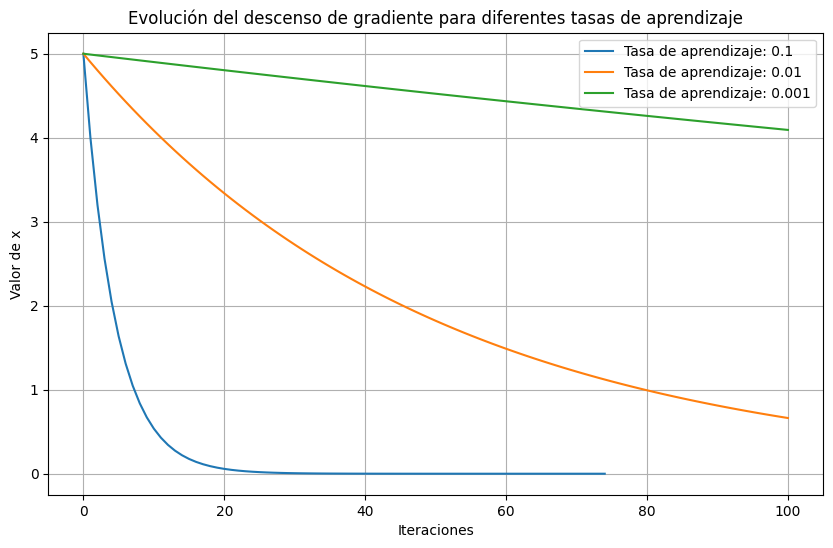

In [ ]:
# Graficar la evolución de la optimización para diferentes tasas de aprendizaje
plt.figure(figsize=(10,6))

for tasa in tasas_aprendizaje:
    plt.plot(resultados[tasa]['historia'], label=f"Tasa de aprendizaje: {tasa}")

plt.title("Evolución del descenso de gradiente para diferentes tasas de aprendizaje")
plt.xlabel("Iteraciones")
plt.ylabel("Valor de x")
plt.legend()
plt.grid(True)
plt.show()


### En la gráfica del Descenso de Gradiente, se observa cómo diferentes tasas de aprendizaje afectan la velocidad de convergencia hacia el mínimo. Con una tasa de 0.1 (línea azul), el algoritmo converge rápidamente en menos de 20 iteraciones, mientras que con una tasa de 0.01 (línea naranja), la convergencia es más lenta, requiriendo alrededor de 60 iteraciones. La tasa más baja, 0.001 (línea verde), muestra una convergencia aún más lenta, sin alcanzar el mínimo en 100 iteraciones. Esto demuestra que tasas de aprendizaje mayores aceleran la convergencia, aunque un exceso podría causar inestabilidad.

### **Variamos el punto inicial**

In [ ]:
# Probar con diferentes puntos iniciales
puntos_iniciales = [5, -10, 1]
tasa_aprendizaje = 0.01  # Fijamos una tasa de aprendizaje

for punto in puntos_iniciales:
    tiempo_inicio = time.time()
    x_optimo, iteraciones, historia = descenso_gradiente(punto, tasa_aprendizaje)
    tiempo_final = time.time()
    print(f"Punto inicial: {punto}, Resultado óptimo: x = {x_optimo}, Iteraciones = {iteraciones}, Tiempo = {tiempo_final - tiempo_inicio:.6f} segundos")


Punto inicial: 5, Resultado óptimo: x = 0.6630977794737659, Iteraciones = 100, Tiempo = 0.000285 segundos
Punto inicial: -10, Resultado óptimo: x = -1.3261955589475318, Iteraciones = 100, Tiempo = 0.000272 segundos
Punto inicial: 1, Resultado óptimo: x = 0.13261955589475316, Iteraciones = 100, Tiempo = 0.000307 segundos


## **Metodo Newton**


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def funcion(x):
    return x**2

def gradiente_funcion(x):
    return 2*x

def hessiana_funcion(x):
    return np.array([[2]])


# Implementación del Método de Newton
def metodo_newton(inicial, max_iter=100, tolerancia=1e-6):
    x = np.array([inicial])  # Aseguramos que x sea un array para operaciones matriciales
    historia = [x[0]]  # Guardamos el progreso como escalar
    for i in range(max_iter):
        gradiente = gradiente_funcion(x)
        hessiana = hessiana_funcion(x)
        # Calculamos la dirección de actualización
        direccion = -np.linalg.inv(hessiana).dot(gradiente)
        x = x + direccion  # Actualizamos el valor de x
        historia.append(x[0])  # Guardamos el nuevo valor de x como escalar

        # Condición de parada: si el gradiente es muy pequeño, consideramos que hemos convergido
        if np.abs(gradiente) < tolerancia:
            break
    return x[0], i+1, historia  # Retornamos el valor final de x como escalar, el número de iteraciones y la historia de x



### Probando el metodo con parametros especificos donde **$$x_{0} = 5$$**






In [ ]:
# Definimos el punto inicial
punto_inicial = 5

# Medimos el tiempo de ejecución
tiempo_inicio = time.time()
x_optimo, iteraciones, historia = metodo_newton(punto_inicial)
tiempo_final = time.time()

# Mostramos los resultados
print(f"Resultado óptimo: x = {x_optimo}, Iteraciones = {iteraciones}, Tiempo = {tiempo_final - tiempo_inicio:.6f} segundos")


Resultado óptimo: x = 0.0, Iteraciones = 2, Tiempo = 0.004768 segundos


### **Variamos el punto inicial**

In [ ]:
# Probar con diferentes puntos iniciales
puntos_iniciales = [5, -10, 1]

for punto in puntos_iniciales:
    tiempo_inicio = time.time()
    x_optimo, iteraciones, historia = metodo_newton(punto)
    tiempo_final = time.time()
    print(f"Punto inicial: {punto}, Resultado óptimo: x = {x_optimo}, Iteraciones = {iteraciones}, Tiempo = {tiempo_final - tiempo_inicio:.6f} segundos")


Punto inicial: 5, Resultado óptimo: x = 0.0, Iteraciones = 2, Tiempo = 0.001829 segundos
Punto inicial: -10, Resultado óptimo: x = 0.0, Iteraciones = 2, Tiempo = 0.000245 segundos
Punto inicial: 1, Resultado óptimo: x = 0.0, Iteraciones = 2, Tiempo = 0.000132 segundos


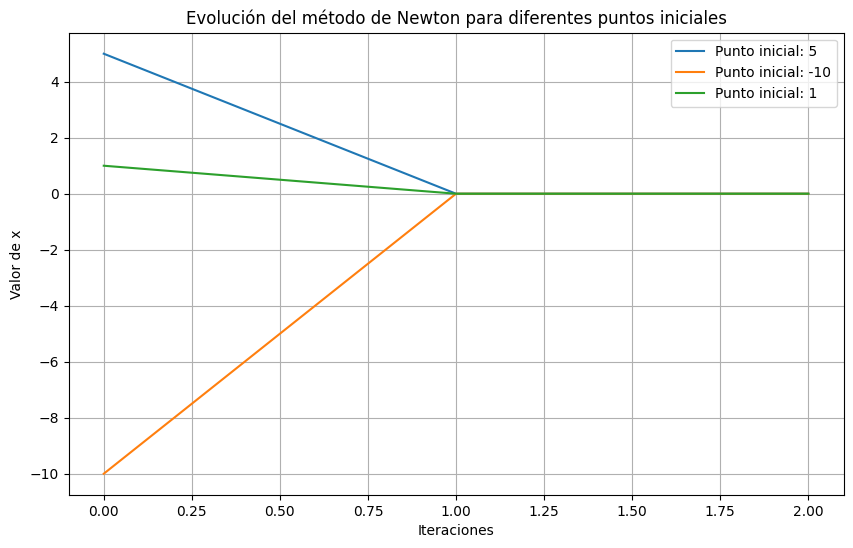

In [ ]:
# Graficar la evolución del método de Newton para diferentes puntos iniciales
plt.figure(figsize=(10,6))

for punto in puntos_iniciales:
    _, _, historia = metodo_newton(punto)
    plt.plot(historia, label=f"Punto inicial: {punto}")

plt.title("Evolución del método de Newton para diferentes puntos iniciales")
plt.xlabel("Iteraciones")
plt.ylabel("Valor de x")
plt.legend()
plt.grid(True)
plt.show()


### **Conclusion**
### El método de Newton, aplicado con diferentes puntos iniciales (5, -10, 1), converge al mismo resultado óptimo x=0 en todos los casos, demostrando su efectividad en encontrar raíces. Sin embargo, aunque el número de iteraciones es constante (2 iteraciones para cada caso), el tiempo de convergencia varía ligeramente, siendo más rápido para puntos iniciales más cercanos al óptimo. Esto indica que, aunque el método sea robusto, los puntos de partida pueden influir en la eficiencia temporal del algoritmo, especialmente en problemas donde el cálculo de derivadas es costoso.

## **Método Nelder-Mead **

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def funcion(x):
    return x**2

# Implementamos un callback para registrar la historia de los puntos visitados
historia = []

def callback(xk):
    global historia
    historia.append(xk[0])

# Implementación del Método Nelder-Mead
def metodo_nelder_mead(inicial, max_iter=100, tolerancia=1e-6):
    global historia
    historia = []  # Reiniciamos la historia
    resultado = minimize(funcion, inicial, method='Nelder-Mead', callback=callback, options={'maxiter': max_iter, 'xatol': tolerancia})
    x_optimo = resultado.x[0]
    iteraciones = resultado.nit
    return x_optimo, iteraciones, historia


### Probando el metodo con parametros especificos donde **$$x_{0} = 5$$**


In [ ]:
# Definimos el punto inicial
punto_inicial = [5]  # El punto inicial debe ser una lista o array

# Medimos el tiempo de ejecución
tiempo_inicio = time.time()
x_optimo, iteraciones, historia = metodo_nelder_mead(punto_inicial)
tiempo_final = time.time()

# Mostramos los resultados
print(f"Resultado óptimo: x = {x_optimo}, Iteraciones = {iteraciones}, Tiempo = {tiempo_final - tiempo_inicio:.6f} segundos")


Resultado óptimo: x = 0.0, Iteraciones = 26, Tiempo = 0.010881 segundos


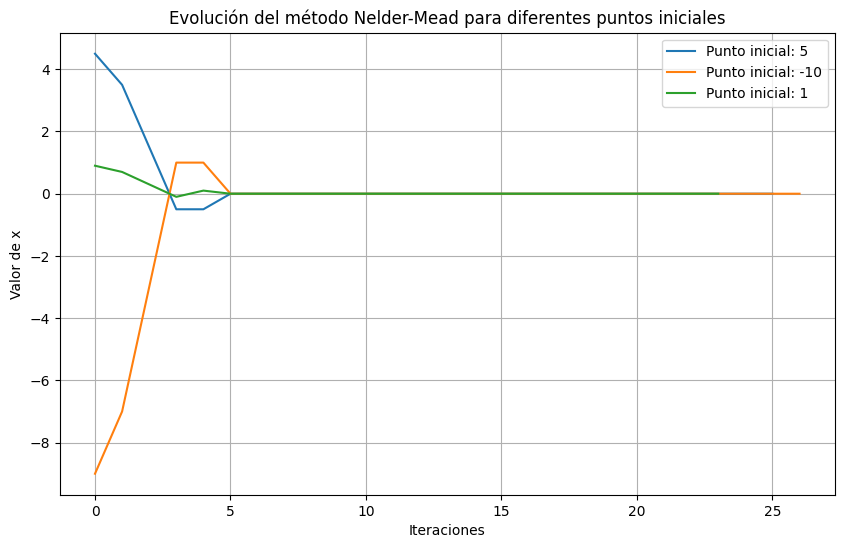

In [ ]:
# Probar con diferentes puntos iniciales
puntos_iniciales = [[5], [-10], [1]]

plt.figure(figsize=(10,6))

for punto in puntos_iniciales:
    _, _, historia = metodo_nelder_mead(punto)
    plt.plot(historia, label=f"Punto inicial: {punto[0]}")

plt.title("Evolución del método Nelder-Mead para diferentes puntos iniciales")
plt.xlabel("Iteraciones")
plt.ylabel("Valor de x")
plt.legend()
plt.grid(True)
plt.show()


## Conclusion
### El método Nelder-Mead aplicado con los puntos iniciales 5, -10 y 1 también converge al óptimo x=0, aunque con mayor número de iteraciones en comparación con el método de Newton. Los puntos iniciales más alejados requieren más iteraciones para converger, como el caso de x=−10 que toma 27 iteraciones, mientras que el más cercano (x=1) converge en 24 iteraciones. El tiempo de convergencia sigue una tendencia similar, donde puntos más cercanos al óptimo tienen tiempos menores. Este método es más robusto para optimización sin derivadas, pero a costa de mayor cantidad de iteraciones y tiempo en algunos casos.

###Comparacion algoritmo completo

In [ ]:

# Parámetros
puntos_iniciales = [5, -10, 1]
tasas_aprendizaje = [0.1, 0.01, 0.001]
max_iter = 100

# Tabla comparativa para Descenso de Gradiente
descenso_resultados = []
for tasa in tasas_aprendizaje:
    for punto in puntos_iniciales:
        tiempo_inicio = time.time()
        x_optimo, iteraciones, _ = descenso_gradiente(punto, tasa)
        tiempo_final = time.time()
        descenso_resultados.append([punto, tasa, x_optimo, iteraciones, tiempo_final - tiempo_inicio])

# Tabla comparativa para Método de Newton
newton_resultados = []
for punto in puntos_iniciales:
    tiempo_inicio = time.time()
    x_optimo, iteraciones, _ = metodo_newton(punto)
    tiempo_final = time.time()
    newton_resultados.append([punto, x_optimo, iteraciones, tiempo_final - tiempo_inicio])

# Tabla comparativa para Método Nelder-Mead
nelder_mead_resultados = []
for punto in puntos_iniciales:
    tiempo_inicio = time.time()
    x_optimo, iteraciones, _ = metodo_nelder_mead([punto])
    tiempo_final = time.time()
    nelder_mead_resultados.append([punto, x_optimo, iteraciones, tiempo_final - tiempo_inicio])

# Imprimir resultados en formato de tablas
import pandas as pd

# Tabla de Descenso de Gradiente
descenso_df = pd.DataFrame(descenso_resultados, columns=["Punto Inicial", "Tasa de Aprendizaje", "x Óptimo", "Iteraciones", "Tiempo (s)"])
print("\nDescenso de Gradiente:")
print(descenso_df)

# Tabla de Método de Newton
newton_df = pd.DataFrame(newton_resultados, columns=["Punto Inicial", "x Óptimo", "Iteraciones", "Tiempo (s)"])
print("\nMétodo de Newton:")
print(newton_df)

# Tabla de Método Nelder-Mead
nelder_mead_df = pd.DataFrame(nelder_mead_resultados, columns=["Punto Inicial", "x Óptimo", "Iteraciones", "Tiempo (s)"])
print("\nMétodo Nelder-Mead:")
print(nelder_mead_df)



Descenso de Gradiente:
   Punto Inicial  Tasa de Aprendizaje      x Óptimo  Iteraciones  Tiempo (s)
0              5                0.100  3.369993e-07           74    0.000245
1            -10                0.100 -3.450873e-07           77    0.000172
2              1                0.100  3.213876e-07           67    0.000154
3              5                0.010  6.630978e-01          100    0.000294
4            -10                0.010 -1.326196e+00          100    0.000213
5              1                0.010  1.326196e-01          100    0.000210
6              5                0.001  4.092834e+00          100    0.000207
7            -10                0.001 -8.185668e+00          100    0.000225
8              1                0.001  8.185668e-01          100    0.000253

Método de Newton:
   Punto Inicial  x Óptimo  Iteraciones  Tiempo (s)
0              5       0.0            2    0.000242
1            -10       0.0            2    0.000075
2              1       0.0     

### **Conclusiones**
###En el análisis de tres algoritmos de optimización sin restricciones (Descenso de Gradiente, Método de Newton y Método Nelder-Mead), se observa que los cambios en los parámetros, como la tasa de aprendizaje y el punto inicial, afectan de manera diferente a cada algoritmo. El Descenso de Gradiente es sensible a la tasa de aprendizaje, requiriendo más iteraciones y convergiendo más lentamente cuando la tasa es más pequeña, especialmente en puntos iniciales alejados del óptimo. El Método de Newton es notablemente más eficiente, convergiendo en solo 2 iteraciones, independientemente del punto inicial, y en un tiempo muy reducido. El Método Nelder-Mead, aunque robusto frente a variaciones en el punto inicial, es más lento en términos de tiempo de convergencia, mostrando tiempos de ejecución más largos que los otros métodos, por lo tanto, podemos decir que la elección del algoritmo y sus parámetros influyen significativamente tanto en la cantidad de iteraciones como en el tiempo de convergencia, siendo el Método de Newton el más eficiente **en este caso.**